In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from sklearn import datasets
from sklearn.model_selection import train_test_split
from numpy.testing import assert_almost_equal
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

## Logistic Regression Using Sklearn

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Load wine dataset

In [4]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Exploratory Analysis

## Distribution of Wine Quality

C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '# of values')

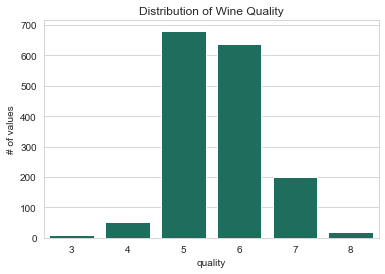

In [7]:
ax = sns.countplot(wine_df['quality'], color=dlsu_green)
ax.set_title("Distribution of Wine Quality")
ax.set_ylabel("# of values")

C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '# of values')

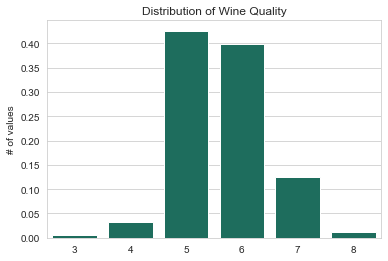

In [8]:
res = wine_df['quality'].value_counts(normalize=True)
ax = sns.barplot(res.index, res.values, color=dlsu_green)
ax.set_title("Distribution of Wine Quality")
ax.set_ylabel("# of values")

## Correlation of Features

Text(0.5, 1.0, 'Correlation Heatmap for Wine Features')

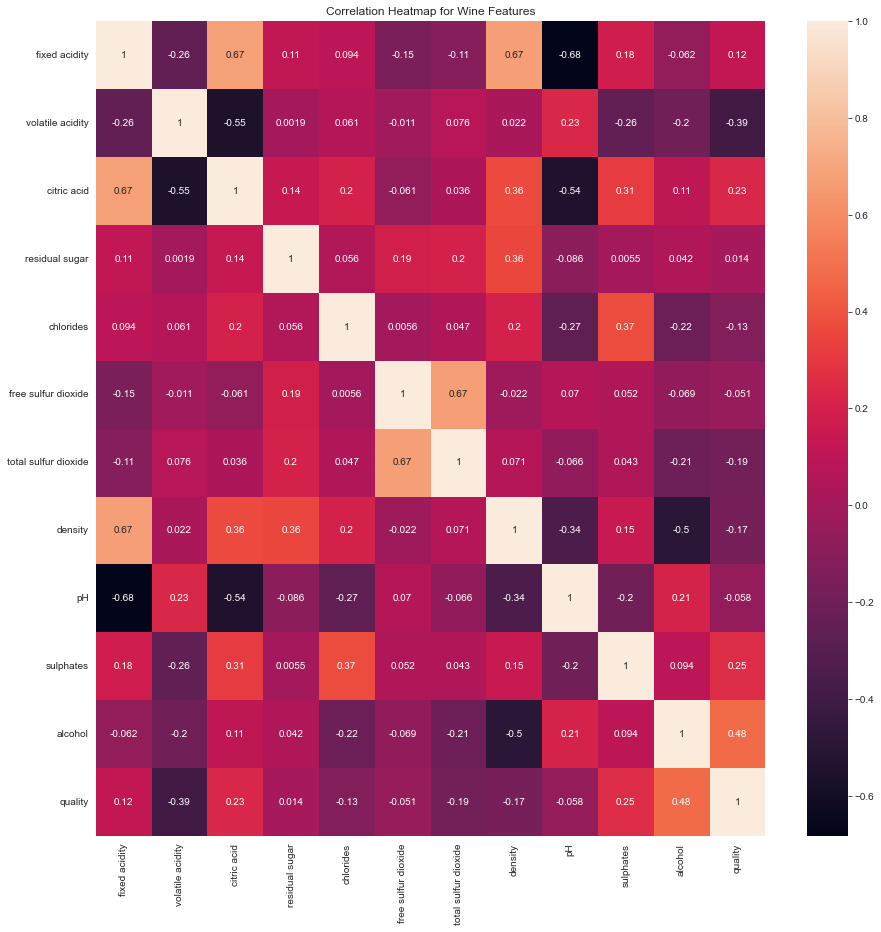

In [10]:
corr = wine_df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, ax=ax)
ax.set_title("Correlation Heatmap for Wine Features")

## Re-frame our problem, from regression to classification

In [11]:
wine_df['quality_classif'] = wine_df.quality.apply(lambda x: 1 if x >= 7 else 0)
wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  quality_classif  
0         9.4        5                0  
1         9.8        5                0  
2         9.8        5                0  
3         9.8        6                0  
4         9.4        5                0  
...       ...      ...              ...  
1594     10.5        5                0  
1595     11.2        6                0  
1596     11.0        6                0  
1597     10.2        5                0  
1598     11.0        6                0  

[1599 rows x 13 columns]

0    1382
1     217
Name: quality_classif, dtype: int64
0    0.86429
1    0.13571
Name: quality_classif, dtype: float64


C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality_classif', ylabel='count'>

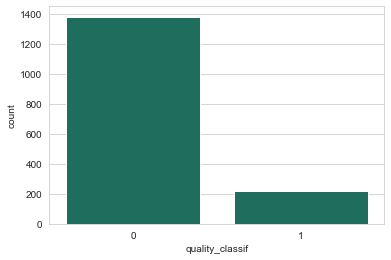

In [12]:
print(wine_df.quality_classif.value_counts())
print(wine_df.quality_classif.value_counts(normalize=True))
sns.countplot(wine_df.quality_classif, color=dlsu_green)

# Build Model

## Train-Test Split Data

In [13]:
X = wine_df.loc[:, 'fixed acidity': 'alcohol']
y = wine_df['quality_classif']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train ",X_train.shape)

print("Test ",X_test.shape)


Train  (1279, 11)
Test  (320, 11)


## Create an Initial Model & Check for Precision, Recall, F1-Score

Logistic regression has 2 hyperparamters that you can tweak. This is the penalty and C arguments. The penalty hyperparameter gives you 2 options l1 (lasso regression) and l2 (ridge regression). These are regularization techniques added into the algorithm. The purpose of regularization is to prevent overfitting/underfitting since logistic regression is prone to this. It is able to achieve this by penalizing high values of coefficients in effect coefficient values become smaller. By having smaller co-efficients you are able to build a "simpler" model. 

The difference between l1 and l2 is that with l1 coefficient values become 0 while l2 will only approach to 0 but never 0. In effect l1 does some form of feature selection method since it zeros out certain features that are not relevant. 

The C hyperparameter is the shrinkage penalty. This number is multiplied onto the coefficients and reduce these values. Hence, larger penalty would lead to smaller coefficients. 

Dive deep here:

https://www.youtube.com/watch?v=Xm2C_gTAl8c&ab_channel=StatQuestwithJoshStarmer <br>
https://hackernoon.com/practical-machine-learning-ridge-regression-vs-lasso-a00326371ece 


In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)


C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Calculate Accuracy

In [19]:
clf.score(X_test,y_test)*100

86.5625

## Calculate Precision, Recall & F1-Score

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)
print(y_pred)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
0.625
0.2127659574468085
0.31746031746031744


## Plot the Feature Importance of the Model

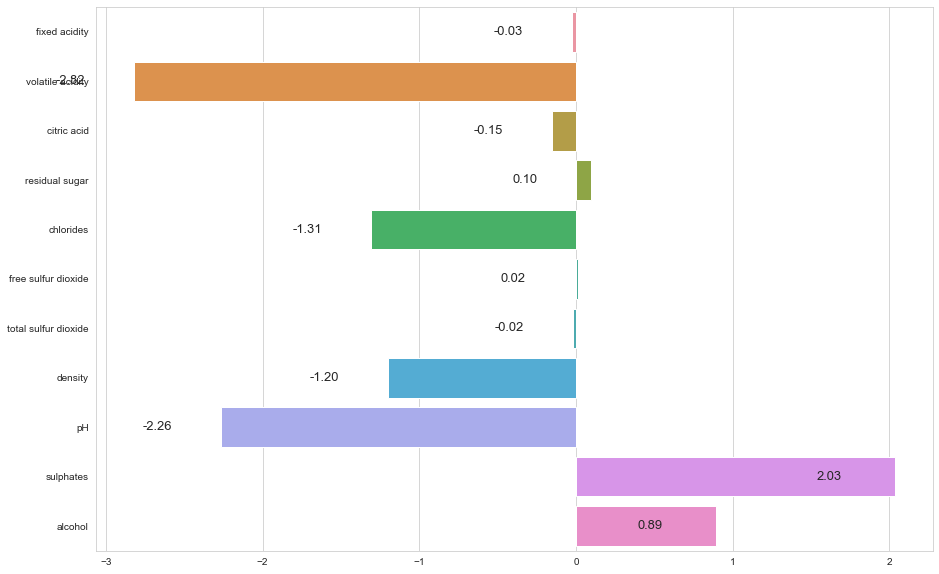

In [23]:
cols = X_train.columns.to_list()
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=clf.coef_[0], y=cols)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width - .5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',
            fontsize=13)  # vertical alignment


## Use K-Means Classifier and Calculate Precision, Recall & F1-Score

In [24]:
from sklearn.neighbors import KNeighborsClassifier

res = []
for k in range(1,15):
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(X_train, y_train)
    
    test_score = clf.score(X_test, y_test) 
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    res.append([k, test_score, precision, recall, f1])
res_df = pd.DataFrame(res, columns=["k", "test_score", "precision", "recall", "f1"])
res_df


k  test_score  precision    recall        f1
0    1    0.853125   0.500000  0.468085  0.483516
1    2    0.850000   0.478261  0.234043  0.314286
2    3    0.850000   0.484848  0.340426  0.400000
3    4    0.859375   0.600000  0.127660  0.210526
4    5    0.856250   0.526316  0.212766  0.303030
5    6    0.850000   0.428571  0.063830  0.111111
6    7    0.840625   0.357143  0.106383  0.163934
7    8    0.846875   0.333333  0.042553  0.075472
8    9    0.837500   0.272727  0.063830  0.103448
9   10    0.840625   0.166667  0.021277  0.037736
10  11    0.850000   0.444444  0.085106  0.142857
11  12    0.843750   0.285714  0.042553  0.074074
12  13    0.837500   0.222222  0.042553  0.071429
13  14    0.846875   0.333333  0.042553  0.075472